# Analysis of Megaline telcom operator's plans

<b> Table of contents </b>

1. [Introduction](#introduction)
2. [General information](#general)
    * [Conclusion](#conclusion1)
3. [Data preprocessing](#preparation)
    * [Missing values](#missing)
    * [Converting types](#conversion)
    * [Grouping the data](#grouping)
    * [Calculations](#calculations)
    * [Conclusion](#conclusion2)
4. [Exploratory Data analysis](#analysis)
    * [Univariate analysis](#univariate)
    * [Bi-variate analysis](#bivariate)
    * [Conclusion](#conclusion3)
5. [Hypotheses testing](#testing)
    * [Conclusion](#conclusion4)
6. [Overall conclusion](#final-conclusion)

<a id="introduction"></a>
## Introduction

We're making an analysis for a telecom operator Megaline, our goal is to analyze users' behaviorfor two plans: Surf and Ultimate, and determine which prepaid plan brings in more revenue.

<b>Project structure</b>

1. General information. We'll open the data files and study general information in detail.
2. Data Preprocessing. Dealing with missing and duplicate data, changing data types etc.
3. Exploratory data analysis. Uni-variate and bi-variate analysis of the data.
4. Statistical Data analysis. Testing the hypotheses.
5. Overall conclusion.

<a id="general"></a>
## General information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from functools import reduce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
try:
    calls_df = pd.read_csv('megaline_calls.csv')
except:
    print('Error while loading the file')

In [3]:
try:
    inet_df = pd.read_csv('megaline_internet.csv')
except:
    print('Error while loading the file')

In [4]:
try:
    messages_df = pd.read_csv('megaline_messages.csv')
except:
    print('Error while loading the file')

In [5]:
try:
    plans_df = pd.read_csv('megaline_plans.csv')
except:
    print('Error while loading the file')

In [6]:
try:
    users_df = pd.read_csv('megaline_users.csv')
except:
    print('Error while loading the file')

<b> Calls info</b>

In [7]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [8]:
calls_df.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [9]:
calls_df.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [10]:
calls_df['user_id'].value_counts().count()

481

In [11]:
calls_df['id'].duplicated().sum()

0

In the dataframe containing information on calls we don't see missing data, but there are several issues to fix:
 - `user_id` is int64 and can be changed to int16, also has the same value for first 10 raws. It probably means that the data is already grouped by `user_id`. For now it seems we have 481 unique user ids.
 - `call_date` is a date but in object type. Has to be converted to `dateTime` object to use it later.
 - `duration` is in float, and as we know in Megaline all durations of calls are rounded up, so we'll have to do that later. We also have 0 values which can be a missing value or perhaps an unanswered call.

<b> Internet traffic </b>

In [12]:
inet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [13]:
inet_df.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [14]:
inet_df.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [15]:
inet_df['user_id'].value_counts().count()

489

 - `user_id` is int64 and can be changed to int16. From this example looks like the data is grouped by `user_id`. We have 489 unique ids.
 - `session_date` is a date, but in object type. Can be converted to `dateTime` object to use it later.
 - `mb_used` is in float, and has to be rounded up too, as we know that Megaline rounds up Mb to Gb per month, so we plan to group by user and month and then round the sum. Also we have 0 value which can be missing data and has to be checked.

<b> Messages info </b>

In [16]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
messages_df.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [18]:
messages_df['user_id'].value_counts().count()

402

 We don't see missing values here too.
 - `user_id` same as in previous dataframes, although here we have 402 unique ids.
 - `call_date` is a date but in object type. Can be converted to `dateTime` object.

<b> Megaline plans</b>

In [19]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [20]:
plans_df.T

,0,1
messages_included,50,1000
mb_per_month_included,15360,30720
minutes_included,500,3000
usd_monthly_pay,20,70
usd_per_gb,10,7
usd_per_message,0.03,0.01
usd_per_minute,0.03,0.01
plan_name,surf,ultimate


This is general information on Megaline plans: <b>surf</b>, <b>ultimate</b>. We have information on pricing, and services included in those plans. No data is missing.

<b>Users' info </b>

In [21]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [22]:
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [23]:
users_df['user_id'].duplicated().sum()

0

We have some general information about our users: their name, age, address, plan and the date user stopped using the plan. We see several issues to deal with:
- for `user_id` column we've checked that all values are unique.
- `age` can be grouped in age groups if we need this variable later for statistics. Either way it can be changed to `int16` for better memory performance.
- `city` is overloaded with information and will be hard to process further. We can group it by areas.
- `churn_date` has only 34 values out of 500. We know that all the missing values mean that when the database was created those users were still using their plans. Overall the evaluation of statistics for users who still use the plan and those who stopped using shouldn't be different as even though those 34 users stopped using their plans they still payed for the services, and that is what we are interested in.

<a id="conclusion1"></a>
### Conclusion

After studying the dataset we can come to several conclusions regarding the future work that has to be done for the analysis:
 - our starting point is 5 separate databases, 4 of which have information on various services usage by user id, and one containing information on plans we're analyzing.
 - `user_id` has maximum of 500 unique values in `users_df` and minimum of 402 unique values in `messages_df`. That tells us that there's a possibility that our united database will have more missing values as not all the users seem to use all the services they get. The best strategy will be to build our main database merging at first all services data and then user info by outer merging to keep all users, and then fill the missing data by 0 as it is also part of our statistics.
 - dates in all databases can be turned to `dateTime` objects, or alternatively we can create a new column for month.
 - `duration` of calls have to be rounded up to minutes.
 - `mb_used` needs to be rounded up to Gb after grouping by month and user.
 - we will also have to count number of messages sent by user per month while grouping.
 - the `plans_df` dataframe will be used to derive totals of payments per month per user.
 - `age` looks ok.
 - `city` is in need of little investigation on whether we'll need filtering to get all NY-NJ users separately.
 - `churn_date` has a lot of missing values and only 34 present, which means that those users stopped using the plans. Still they are fit for research as they probably were charged the minimum monthly payment.
 
Overall it seems there's a lot of grouping to be done and taking into account the needs of the analysis, it will be better to create a target database from several grouped dfs.

<a id="preparation"></a>
## Data preprocessing

<a id="missing"></a>
### Missing values

1. First of all, we saw 0 values in `duration` column in calls_df. It can be unanswered call or it can be a missing value, or a value rounded down. Let's see how many 0 values we have.

In [24]:
len(calls_df[calls_df['duration'] == 0]) / len(calls_df)

0.1948233927469416

19% isn't a small piece of data. Let's take a look at the rows. Then we'll check whether the data is missing for only some of the users.

In [25]:
calls_df[calls_df['duration'] == 0].head(10)

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
39,1001_43,1001,2018-12-13,0.0
44,1001_52,1001,2018-11-23,0.0
45,1001_53,1001,2018-10-24,0.0
49,1001_60,1001,2018-12-16,0.0
61,1001_84,1001,2018-10-07,0.0


In [26]:
len(calls_df[calls_df['duration'] == 0]['user_id'].unique()) / len(calls_df['user_id'].unique())

0.9937629937629938

As we can see almost all of the users have 0 values among others. Let's compare it to 0.1 and 0.2 values to estimate quantities.

In [27]:
len(calls_df[calls_df['duration'] == 0.1]) / len(calls_df)

0.0004283588049515374

In [28]:
len(calls_df[calls_df['duration'] == 0.2]) / len(calls_df)

0.00043561912367952955

*Conclusion*: The amount of really short calls (0.1 ~ 6sec, 0.2 ~12 sec) is uncomparable to 19% of 0 values.
We've checked several theories to find out what may be the cause of 0 values: 
 - *it is an error or missing data* - seems unlikely as we have 478 users with various repetitiveness of this value and it's 99% of all the users.
 - *it is a short call rounded down* - can not be confirmed: our data is in minutes, so 0.1 values that we have means  6 seconds. We don't know whether it says that all values up to 6 seconds included are rounded up to 0.1, or not. On the other hand, there are less than 1% of 0.1 or 0.2 values, which is a very small number compared to almost 20% of 0 values. If 0 value ment short calls we'd expect to see a more or less similar distribution between extremely short calls. Also, it sounds plausible that there are few occasions to make a call for less than 6 seconds, so probably those are already included in 0.1 value.
 - *it is an unanswered call* - same as a short call we can't know for sure. If we could we would have consulted with the team to better understand the mechanisms of measuring the duration of a call. Still, we saw that 99% of users have this 0 value, and comparing it to numbers of 0.1 and 0.2 value, highly likely it means an unanswered call. It seems reasonable that almost everyone has missed calls once in a while, being unable to answer during work hours, being with children etc.

In conclusion we decided to treat it as a missed call and to leave 0 value as it is as it won't be calculated for the monthly payment.

2. Next let's check 0 values in `mb_used`.

In [29]:
len(inet_df[inet_df['mb_used'] == 0]) / len(inet_df)

0.1311423801574052

In [30]:
inet_df[inet_df['mb_used'] == 0].head(10)

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
44,1001_80,1001,2018-12-24,0.0
46,1001_84,1001,2018-10-13,0.0
54,1001_94,1001,2018-12-03,0.0
58,1001_103,1001,2018-12-10,0.0
64,1001_124,1001,2018-09-28,0.0


In [31]:
len(inet_df[inet_df['mb_used'] == 0]['user_id'].unique()) / len(inet_df['user_id'].unique())

0.9754601226993865

*Conclusion*: same as in the previous case it looks like 97% of users have used 0 Mb at some point, and it seems reasonable. We'll conclude that this is not a missing value, but it's just that users didn't use mobile Internet every day.

3. `churn_date` column has only 34 values present, let's take a look at them.

In [32]:
users_df[users_df['churn_date'].notnull() == True]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


*Conclusion*: These users discontinued using Megaline plans at various points of the year, also there are representatives of both plans. We can see that some of the users stopped using their plan the same month they started it. We don't know the exact policy Megaline has for those who change the plan before a whole month is due, but usual policy in this field is to receive payment for the whole month. Also as we're going to use averages per month and not per year it is ok either to leave them or to drop them. If so, we're going to leave them.

<a id="conversion"></a>
### Converting types

At first, let's convert all `user_id` columns into int16. It may save us some memory usage.

In [33]:
listed_df = [users_df, calls_df, messages_df, inet_df]

for i in range(0, 4):
    try:
        listed_df[i]['user_id'] = pd.to_numeric(listed_df[i]['user_id']).astype('int16')
    except:
        print('Check the data type')
    print(listed_df[i].info())
    print('-----------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int16 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int16(1), int64(1), object(6)
memory usage: 28.4+ KB
None
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int16  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int16(1), object(2)
memo

Next, let's create a month column for all dfs with dates as we need that to calculate averages later. We're not going to permanently change the type of date columns to dateTime as for now there's no need in that.

In [34]:
listed_df = [calls_df, inet_df, messages_df]
listed_names = ['call_date', 'session_date', 'message_date']

date_format = '%Y-%m-%d'

for i in range(0, 3):
    listed_df[i]['month'] = pd.DatetimeIndex(pd.to_datetime(listed_df[i][listed_names[i]], format=date_format)).month
    print(listed_names[i], '\n{}'.format(listed_df[i]['month'].value_counts().sort_index()))
    print('--------------------------------------')

call_date 
1       172
2       774
3      1620
4      3442
5      5959
6      8221
7     11105
8     13590
9     16523
10    21064
11    24651
12    30614
Name: month, dtype: int64
--------------------------------------
session_date 
1        96
2       604
3      1336
4      2558
5      4288
6      6057
7      8110
8     10718
9     12722
10    16193
11    18651
12    23492
Name: month, dtype: int64
--------------------------------------
message_date 
1        83
2       259
3       594
4      1333
5      2780
6      3833
7      5208
8      7394
9      9227
10    12201
11    14068
12    19071
Name: month, dtype: int64
--------------------------------------


Half of the year seems grately overweighted, we know that the data we have is supposed to be the data from one year, but still it's better to check:

In [35]:
for i in range(0, 3):
    print(listed_names[i], '\n{}'.format(pd.DatetimeIndex(pd.to_datetime(listed_df[i][listed_names[i]], format='%Y-%m-%d')).year.value_counts()))
    print('-------------------')

call_date 
2018    137735
Name: call_date, dtype: int64
-------------------
session_date 
2018    104825
Name: session_date, dtype: int64
-------------------
message_date 
2018    76051
Name: message_date, dtype: int64
-------------------


*Conclusion*: we should be checking how these databases were created with the team if we could, but for now we can only assume that the plans are new to Megaline and started running only at the beginning of the year so they had few users using them, but by the end of the year the amount of users grew. Also it can be that we were purposely given data about only new users starting from 2018. It's a good idea to study this phenomena closely later in the research.

Next, let's check `city` column from users_df. Later we will need to analyze whether the average revenue from users in NY-NJ area is different from that of the users from other regions. Before that, let's check how can we recognize them and whether there's need in filtering.

In [36]:
users_df['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

In [37]:
len(users_df[users_df['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']) / len(users_df)

0.16

NY-NJ is mostly already grouped, but we can also see a separate instance of 'Albany-Schenectady-Troy, NY MSA', meaning there could be others like that. Let's create a function to get a separate filter column:

In [38]:
def search_city(row):
    word1 = 'NY'
    word2 = 'NJ'
    count = 0
    
    if word1 not in row['city']:
        if word2 not in row['city']:
            count += 0
    else:
        count += 1
    
    return count

In [39]:
users_df['NY-NJ'] = users_df.apply(search_city, axis=1)

In [40]:
users_df[users_df['NY-NJ'] == 1]['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA    80
Rochester, NY MSA                             3
Buffalo-Cheektowaga, NY MSA                   2
Albany-Schenectady-Troy, NY MSA               1
Name: city, dtype: int64

*Conclusion*: We saw that our target group is mostly gathered under `New York-Newark-Jersey City, NY-NJ-PA MSA` value, but noticed separate instances. So we've created a separate column by giving values of 1 for all users that we need for our target group. All others received 0 value. This way it will be easier for us to proceed with the research.

<a id="grouping"></a>
### Grouping the data

1. At first, we'll create 3 dataframes from `calls_df`, `messages_df` and `inet_df` by grouping by user and by month. We'll get the totals of minutes, Mb, and numbers of calls, sessions and messages. We also want to rename the columns for them to better portray their current meaning. Before that, we'll round up minutes in `calls_df` as it is stated that even 1 second of any call is counted as a minute, from what we can conclude that rounding per Megaline's policy should be done daily and not once a month. 

In [41]:
calls_df['duration'] = np.ceil(calls_df['duration'])

In [42]:
calls_df['duration'].value_counts().sort_index()

0.0     26834
1.0      5795
2.0      6446
3.0      6942
4.0      7434
5.0      7778
6.0      7848
7.0      7769
8.0      7718
9.0      7357
10.0     6918
11.0     6407
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
34.0        2
36.0        3
37.0        1
38.0        1
Name: duration, dtype: int64

In [43]:
calls_grouped = calls_df.groupby(['user_id', 'month']).agg({'duration' : 'sum', 'call_date' : 'count'}).reset_index()

In [44]:
calls_grouped.rename(columns = {'duration' : 'total_minutes', 'call_date' : 'n_calls'}, inplace=True)

In [45]:
calls_grouped

,user_id,month,total_minutes,n_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53
2256,1499,11,308.0,45


In [46]:
inet_grouped = inet_df.groupby(['user_id', 'month']).agg({'mb_used' : 'sum', 'session_date' : 'count'}).reset_index()

In [47]:
inet_grouped.rename(columns={'mb_used':'total_mb', 'session_date':'n_sessions'}, inplace=True)
inet_grouped

,user_id,month,total_mb,n_sessions
0,1000,12,1901.47,5
1,1001,8,6919.15,25
2,1001,9,13314.82,53
3,1001,10,22330.49,56
4,1001,11,18504.30,51
...,...,...,...,...
2272,1498,12,23137.69,65
2273,1499,9,12984.76,45
2274,1499,10,19492.43,61
2275,1499,11,16813.83,49


In [48]:
sms_grouped = messages_df.groupby(['user_id', 'month'])['message_date'].agg('count').reset_index()

In [49]:
sms_grouped.rename(columns={'message_date':'n_sms'}, inplace=True)
sms_grouped

,user_id,month,n_sms
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Now we can convert Mb to Gb per month following Megaline's policy.

In [50]:
inet_grouped['total_gb'] = np.ceil(inet_grouped['total_mb'] / 1024)

In [51]:
inet_grouped.head()

,user_id,month,total_mb,n_sessions,total_gb
0,1000,12,1901.47,5,2.0
1,1001,8,6919.15,25,7.0
2,1001,9,13314.82,53,14.0
3,1001,10,22330.49,56,22.0
4,1001,11,18504.30,51,19.0


2. As our second step, we'll create one database containing all the information we have on all users needed for research. For this we'll use merge method, specifying 'outer' merging, as there's a big chance that databases that we have contain unique ids of people who use the plans only partialy (for example, don't use sms at all).

We'll use `reduce` function from `functools` library to merge all the datasets together at once.

In [52]:
groups_listed = [calls_grouped, sms_grouped, inet_grouped]

final_data = reduce(lambda left, right : pd.merge(
    left, right, how='outer', on=['user_id', 'month']).fillna(0), groups_listed)

In [53]:
len(final_data)

2293

In [54]:
final_data.head(10)

,user_id,month,total_minutes,n_calls,n_sms,total_mb,n_sessions,total_gb
0,1000,12,124.0,16.0,11.0,1901.47,5.0,2.0
1,1001,8,182.0,27.0,30.0,6919.15,25.0,7.0
2,1001,9,315.0,49.0,44.0,13314.82,53.0,14.0
3,1001,10,393.0,65.0,53.0,22330.49,56.0,22.0
4,1001,11,426.0,64.0,36.0,18504.30,51.0,19.0
5,1001,12,412.0,56.0,44.0,19369.18,60.0,19.0
6,1002,10,59.0,11.0,15.0,6552.01,21.0,7.0
7,1002,11,386.0,55.0,32.0,19345.08,52.0,19.0
8,1002,12,384.0,47.0,41.0,14396.24,51.0,15.0
9,1003,12,1104.0,149.0,50.0,27044.14,52.0,27.0


Finally we're going to add user information, such as the plan and the city that we need for the analysis.

In [55]:
final_data = final_data.merge(users_df, on='user_id', how='left')

In [56]:
final_data.T

,0,1,2,3,4,5,6,7,8,9,...,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292
user_id,1000,1001,1001,1001,1001,1001,1002,1002,1002,1003,...,1204,1204,1224,1349,1349,1349,1361,1482,1108,1311
month,12,8,9,10,11,12,10,11,12,12,...,11,12,6,10,11,12,5,10,12,6
total_minutes,124.0,182.0,315.0,393.0,426.0,412.0,59.0,386.0,384.0,1104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n_calls,16.0,27.0,49.0,65.0,64.0,56.0,11.0,55.0,47.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n_sms,11.0,30.0,44.0,53.0,36.0,44.0,15.0,32.0,41.0,50.0,...,42.0,78.0,5.0,76.0,72.0,61.0,2.0,2.0,0.0,0.0
total_mb,1901.47,6919.15,13314.82,22330.49,18504.3,19369.18,6552.01,19345.08,14396.24,27044.14,...,21346.95,36730.05,2966.21,13093.55,17128.26,13039.91,1519.69,0.0,233.17,1498.83
n_sessions,5.0,25.0,53.0,56.0,51.0,60.0,21.0,52.0,51.0,52.0,...,38.0,80.0,4.0,26.0,32.0,27.0,9.0,0.0,2.0,9.0
total_gb,2.0,7.0,14.0,22.0,19.0,19.0,7.0,19.0,15.0,27.0,...,21.0,36.0,3.0,13.0,17.0,13.0,2.0,0.0,1.0,2.0
first_name,Anamaria,Mickey,Mickey,Mickey,Mickey,Mickey,Carlee,Carlee,Carlee,Reynaldo,...,Sherly,Sherly,Kelly,Florentina,Florentina,Florentina,Jacelyn,Armand,Porfirio,Cherlyn
last_name,Bauer,Wilkerson,Wilkerson,Wilkerson,Wilkerson,Wilkerson,Hoffman,Hoffman,Hoffman,Jenkins,...,Levy,Levy,Cole,Diaz,Diaz,Diaz,Hoffman,Glenn,Kane,Saunders


In [57]:
final_data['plan'].isnull().sum()

0

*Conclusion*: our final dataset has 2293 rows which is only a little bit bigger than any other grouped dfs. We've checked whether there are missing values in `plan` column, and by doing this we've confirmed that users' info merged successfully to all the rows (as we didn't have missing values in `users_df` from the beginning). Now our dataset is ready for calculations.

<a id="calculations"></a>
### Calculations

In this step we'll calculate the monthly revenue per user. But first, a little reminder about the plans:
<br><b>Surf</b>

1. Monthly charge: 20 dollars
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
    - 1 minute: 3 cents
    - 1 text message: 3 cents
    - 1 GB of data: 10 dollars

<b>Ultimate</b>

1. Monthly charge: 70 dollars
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
    - 1 minute: 1 cent
    - 1 text message: 1 cent
    - 1 GB of data: 7 dollars
    
And the same data we have in plans_df:

In [58]:
plans_df.T

,0,1
messages_included,50,1000
mb_per_month_included,15360,30720
minutes_included,500,3000
usd_monthly_pay,20,70
usd_per_gb,10,7
usd_per_message,0.03,0.01
usd_per_minute,0.03,0.01
plan_name,surf,ultimate


We're creating a function to calculate revenue per month. As we can see from the plans_df above, we can use indexing to make our function more universal in case we'll need this code for upgraded plans in future.

In [59]:
def month_revenue(row):
    plan = row['plan']
    calls = row['total_minutes']
    sms = row['n_sms']
    traffic = row['total_gb']
    
    #getting index value for getting access to plans_df rows
    if plan == 'surf':
        i = 0
    elif plan == 'ultimate':
        i = 1
    
    #creating universal upper limits for plans
    calls_lim = plans_df['minutes_included'][i]
    sms_lim = plans_df['messages_included'][i]
    gb_lim = plans_df['mb_per_month_included'][i] / 1024
    plan_cost = plans_df['usd_monthly_pay'][i]
    
    #considering every user in a table payed at least the minimum cost of the plan:
    revenue = plan_cost
    
    if calls > calls_lim:
        revenue += (calls - calls_lim) * plans_df['usd_per_minute'][i]
    else:
        revenue += 0
    if sms > sms_lim:
        revenue += (sms - sms_lim) * plans_df['usd_per_message'][i]
    else:
        revenue += 0
    if traffic > gb_lim:
        revenue += (traffic - gb_lim) * plans_df['usd_per_gb'][i]
    else:
        revenue += 0

    return revenue

In [60]:
final_data['revenue'] = final_data.apply(month_revenue, axis=1)
final_data

,user_id,month,total_minutes,n_calls,n_sms,total_mb,n_sessions,total_gb,first_name,last_name,age,city,reg_date,plan,churn_date,NY-NJ,revenue
0,1000,12,124.0,16.0,11.0,1901.47,5.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0,70.00
1,1001,8,182.0,27.0,30.0,6919.15,25.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,20.00
2,1001,9,315.0,49.0,44.0,13314.82,53.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,20.00
3,1001,10,393.0,65.0,53.0,22330.49,56.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,90.09
4,1001,11,426.0,64.0,36.0,18504.30,51.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,27.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,0,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,9.0,2.0,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN,0,20.00
2290,1482,10,0.0,0.0,2.0,0.00,0.0,0.0,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaN,1,70.00
2291,1108,12,0.0,0.0,0.0,233.17,2.0,1.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaN,0,70.00


In [61]:
final_data['revenue'].describe()

count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: revenue, dtype: float64

<a id="conclusion2"></a>
### Conclusion

Preparing our data at first we've dealt with several issues:

 - `duration` column from calls_df has 0 values, which makes 19% of the data. We've checked several theories to find out what may be the cause, and decided to treat it as a missed call and leave 0 value as it is.
 - `mb_used` also has 0 values which we concluded looked genuine and meant a user not using mobile Internet, and left as it it.
 - `churn_date` has only 37 values present and others missing. We concluded that it looks natural, and there's no need to change anything, as probably even people who used one of the plans less than a month at least payed the monthly cost.

<br>Then we've used data conversion for some columns:
 - we've converted all `user_id` columns from `int64` to `int16` for better memory performance.
 - we've created `month` column for each relevant df.
 - we've checked whether there's a need to change anything in `city` column and found that there were some separate instances of 'NY', so we've created an additional column `NY-NJ` to differentiate our target group by 0/1 values.

<br>As a next step we've created grouped dfs before merging them:
 - we've created grouped dfs for calls, Internet and messages dfs. We've grouped by `user_id` and `month`, summing and counting relevant values.
 - then we've created a single dataframe containing all the relevant information for the research.

<br>Final preparation:
 - we've created a function for calculating the revenue per user per month.

<br>Now we're ready for the analysis.

<a id="analysis"></a>
## Exploratory Data analysis

<a id="univariate"></a>
### Univariate analysis

Now let's take a look at the shapes of our data.

At first, we want to take a closer look at our plans.

In [62]:
month_pivot = final_data.pivot_table(index='month', columns='plan', values='user_id', aggfunc='count')
month_pivot.columns = ['Surf', 'Ultimate']
month_pivot

,Surf,Ultimate
month,,
1,2,4
2,9,7
3,23,12
4,50,21
5,77,29
6,97,47
7,121,59
8,162,71
9,194,86


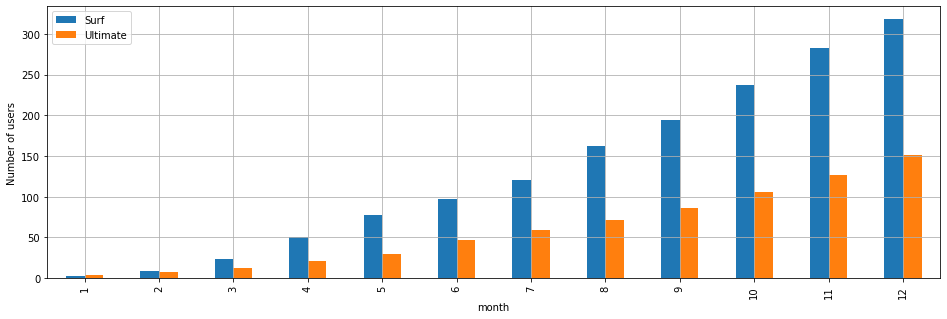

In [63]:
month_pivot.plot(kind='bar', grid=True, figsize=(16, 5))
plt.xlabel('month')
plt.ylabel('Number of users')

plt.show()

As we've noticed before both plans start with a few users at the beginning of the year and have a stable growth. It looks reasonable that there are fewer users using 'Ultimate' plan as it is the most expensive, so we can't compare pure numbers between 2 plans, but it is curious to check which of the two plans grew at a higher pace.

In [64]:
growth1 = []
growth2 = []
n1 = month_pivot['Surf'][12] / month_pivot['Surf'][1]
n2 = month_pivot['Ultimate'][12] / month_pivot['Ultimate'][1]
  
for i in range(0, 11):
    growth1.append(month_pivot['Surf'][i + 2] / month_pivot['Surf'][i + 1])
    growth2.append(month_pivot['Ultimate'][i + 2] / month_pivot['Ultimate'][i + 1])
    
print('The number of users for "Surf" grew in {:.2f} times from the beginning of the year, average growth pace: {:.2f}'
      .format(n1, np.mean(growth1)))
print('The number of users for "Ultimate" grew in {:.2f} times from the beginning of the year, average growth pace: {:.2f}'
      .format(n2, np.mean(growth2)))

The number of users for "Surf" grew in 159.00 times from the beginning of the year, average growth pace: 1.76
The number of users for "Ultimate" grew in 37.75 times from the beginning of the year, average growth pace: 1.41


*Conclusion*: as we can see although both plans grew considerably from the beginning of the year, "Surf"'s audience grew faster and much greater.

Now let's take a look at our quantitative variables.

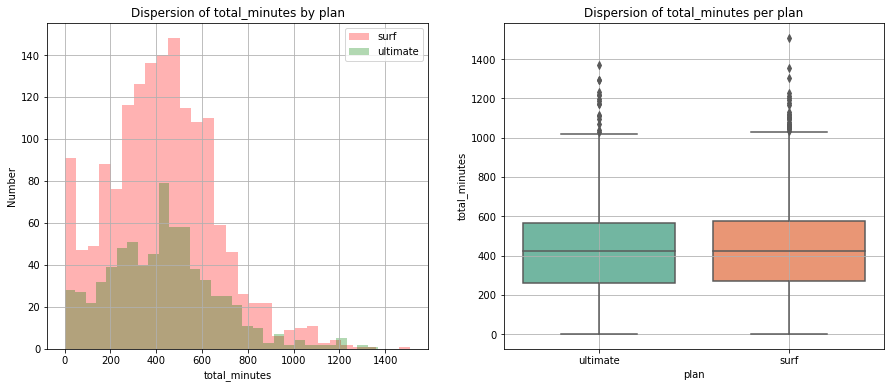

Surf mean: 428.75   |   Ultimate mean: 430.45
Surf std: 234.45   |  Ultimate std: 240.51
Surf median: 425.0  |  Ultimate median: 424.0
Surf is centered around average
Ultimate is centered around average

----------------------------------------------------------------------------------------------------


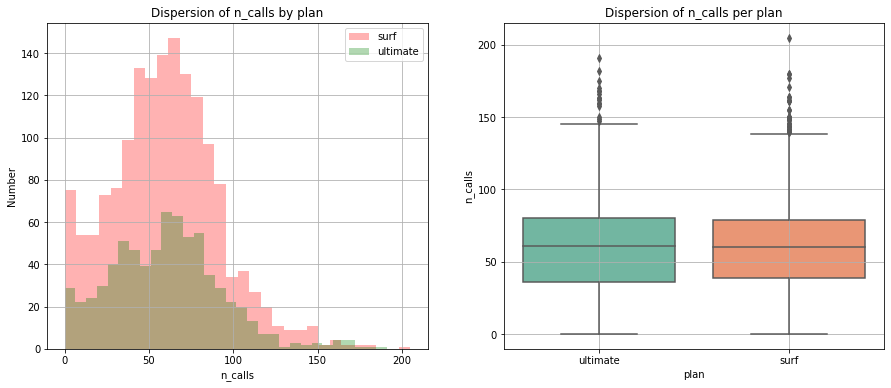

Surf mean: 59.81   |   Ultimate mean: 60.63
Surf std: 32.02   |  Ultimate std: 33.24
Surf median: 60.0  |  Ultimate median: 61.0
Surf is centered around average
Ultimate is centered around average

----------------------------------------------------------------------------------------------------


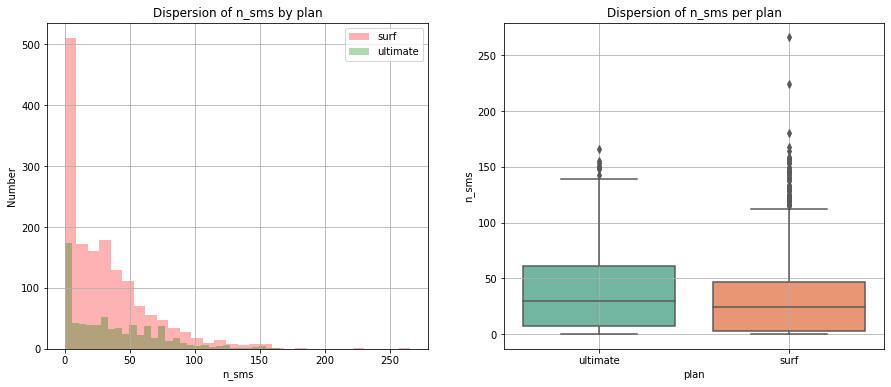

Surf mean: 31.16   |   Ultimate mean: 37.55
Surf std: 33.57   |  Ultimate std: 34.77
Surf median: 24.0  |  Ultimate median: 30.0
Surf varies a lot
Ultimate is centered around average

----------------------------------------------------------------------------------------------------


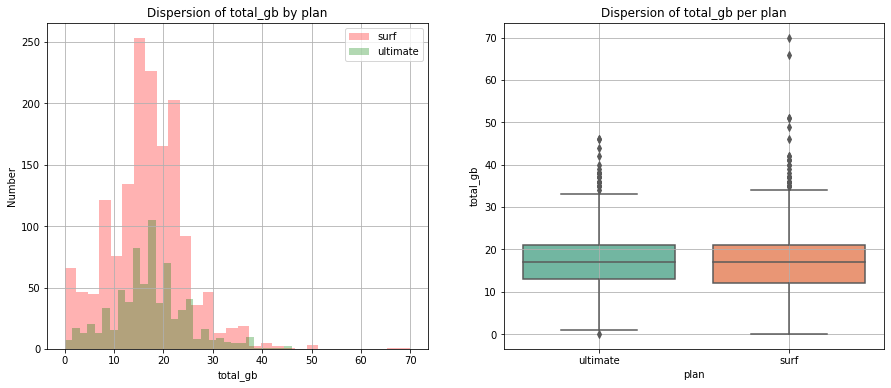

Surf mean: 16.67   |   Ultimate mean: 17.31
Surf std: 7.85   |  Ultimate std: 7.67
Surf median: 17.0  |  Ultimate median: 17.0
Surf is centered around average
Ultimate is centered around average

----------------------------------------------------------------------------------------------------


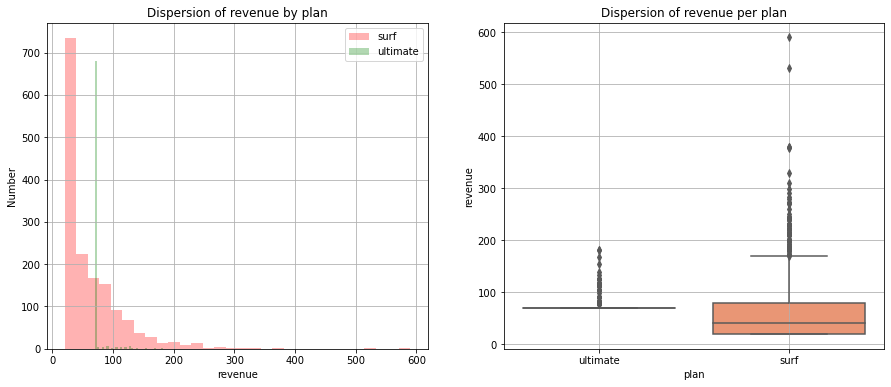

Surf mean: 60.71   |   Ultimate mean: 72.31
Surf std: 55.39   |  Ultimate std: 11.40
Surf median: 40.36  |  Ultimate median: 70.0
Surf is centered around average
Ultimate is centered around average

----------------------------------------------------------------------------------------------------


In [65]:
listed_hist = ['total_minutes', 'n_calls', 'n_sms', 'total_gb', 'revenue']

for name in listed_hist:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    ax[0].hist(x=final_data[final_data['plan'] == 'surf'][name], bins=30, color='red', alpha=0.3, label='surf')
    ax[0].hist(x=final_data[final_data['plan'] == 'ultimate'][name], bins=30, color='green', alpha=0.3, label='ultimate')
    ax[0].grid()
    
    ax[0].legend()
    
    ax[0].set_title('Dispersion of {} by plan'.format(name))
    ax[0].set_ylabel('Number')
    ax[0].set_xlabel(name)
    
    ax[1] = sns.boxplot(x='plan', y=name, data=final_data, palette='Set2')
    ax[1].grid()
    ax[1].set_title('Dispersion of {} per plan'.format(name))
    
    plt.show()
    
    std_surf = final_data.query('plan == "surf"')[name].std()
    std_ult =  final_data.query('plan == "ultimate"')[name].std()
    mean_surf = final_data.query('plan == "surf"')[name].mean()
    mean_ult = final_data.query('plan == "ultimate"')[name].mean()
    median_surf = final_data.query('plan == "surf"')[name].median()
    median_ult = final_data.query('plan == "ultimate"')[name].median()
    
    print('Surf mean: {:.2f}   |   Ultimate mean: {:.2f}'.format(mean_surf, mean_ult))
    print('Surf std: {:.2f}   |  Ultimate std: {:.2f}'.format(std_surf, std_ult))
    print('Surf median: {}  |  Ultimate median: {}'.format(median_surf, median_ult))
    if std_surf / mean_surf > 1:
        print("Surf varies a lot")
    else:
        print('Surf is centered around average')
    if std_ult / mean_ult > 1:
        print("Ultimate varies a lot")
    else:
        print('Ultimate is centered around average')
    print()
    print('----------------------------------------------------------------------------------------------------')

*Conclusion*: 
 - `total_minutes`: the data is skewed to the right, we can also see that there's only a slight difference between mean and median, which tells us that there are some outliers, though not very extreme and not so many as to set mean and median far apart. Checking mean and standard deviation we can conclude that the data is mostly centered around the mean. Boxplots also look almost identical, though there are more visible outliers in 'Surf' than in 'Ultimate'. We can conclude that there's no significant difference between the plans in terms of time spent on phone calls. The average number of minutes per month for our user is about 425 for both plans. On the other hand comparing graphs to the number of minutes included in plans we can tell that for Ultimate absolute majority of users don't go overboard, the upper whisker of boxplot is just a bit greater than 1000 minutes (1000 is the upper limit for Ultimate). As for Surf, the upper limit is 500, but about 50% of users use from 425 to just above 1000 minutes per month. We can conclude that for Surf there's a stable streak of users that go overboard the limit and pay extra.
 - `n_calls`: We can see that even the number of calls doesn't differ very much between the plans, Ultimate's median being only slightly bigger that Surf's. The average number of calls per month is about 60 for both plans, making the average time needed for one call 7 minutes.
 - `n_sms`: from these plots, we can also spot some differences between two plans, being that in Surf we have considerably more outliers that pull our mean: even though 50% of users use no more than 24 sms per month, the mean is 31. Still, even 31 is not over the sms limit for 'Surf', being 50 sms. Half of the users use from 24 to about 110 sms per month, and we see that the data varies. There's also a considerable part of users that go over their limit of sms for Surf. Ultimate upper half of the boxplot is from 30 to about 140 sms per month, which is still very far from the limit they have (1000 sms per month). We can't forget to mention that a lot of users in both plans don't use sms at all or use just a few.
 - `gb_total`: The data is skewed to the right, although without the outliers the shape of Ultimate data reminds normal distribution. Half of the users use up to 17 Gb, and the other half up to about 32 Gb, making it again that almost none of them go over the limit, being 30 Gb. For Surf however, even though the distribution looks exactly the same, that means that 50% of users go over their limit being 15 Gb per month and pay extra.
 - `revenue`: the data is right-skewed, for both plans the data is centered around the average, though still we can see that Surf's mean is pulled by outliers making mean 60 while the median is only 40. For Ultimate mean(72) is very close to median(70), std is also very low, and we can see from the boxplot that there's almost to no variation of the data. If there weren't outliers visible we would have run checks for the revenue column. This implies that users using Ultimate rarely go over the limits of their plan, it is sufficient, while the limits of Surf are often not enough for the users.

<a id="bivariate"></a>
### Bi-variate analysis

Let's check what service influences the revenue the most:

 - `n_sms`
 - `total_minutes`
 - `total_gb`

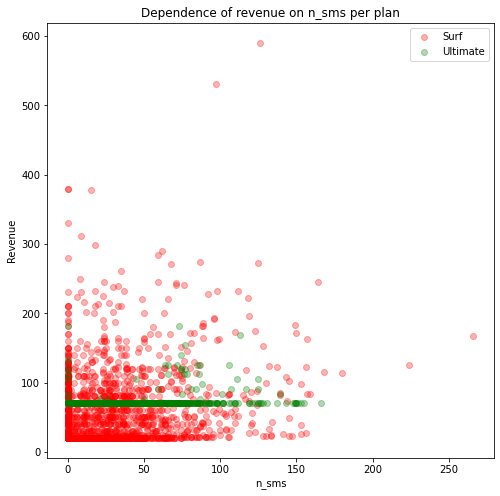

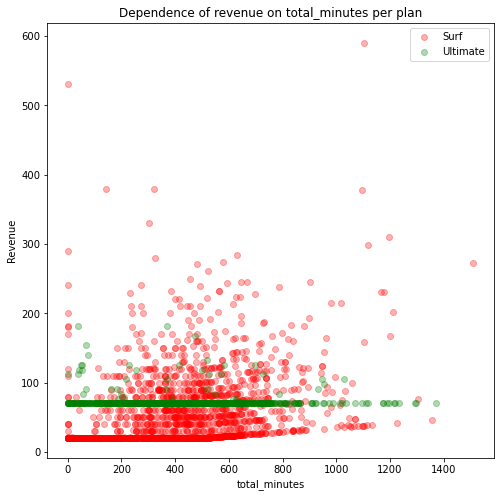

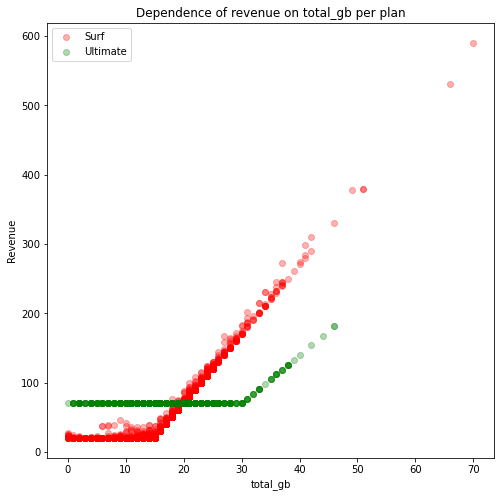

                  n_sms  total_minutes  total_gb   revenue
n_sms          1.000000       0.241799  0.219047  0.157644
total_minutes  0.241799       1.000000  0.320659  0.222645
total_gb       0.219047       0.320659  1.000000  0.778781
revenue        0.157644       0.222645  0.778781  1.000000


In [66]:
listed_scatter = ['n_sms', 'total_minutes', 'total_gb', 'revenue']

for name in listed_scatter:
    if name == 'revenue':
        continue
    else:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.scatter(final_data.query('plan == "surf"')[name], final_data.query('plan == "surf"')['revenue'],
                   color='red', alpha=0.3, label='Surf')
        ax.scatter(final_data.query('plan == "ultimate"')[name], final_data.query('plan == "ultimate"')['revenue'],  
                   color='green', alpha=0.3, label='Ultimate')

        ax.legend()

        ax.set_title('Dependence of revenue on {} per plan'.format(name))
        ax.set_xlabel(name)
        ax.set_ylabel('Revenue')

        plt.show()

print(final_data[listed_scatter].corr())

*Conclusion*: of course all the services influence the revenue, but we can see that the usage of Internet has the strongest positive correlation: the more users use it, the more they pay. It can be taken into consideration for future profits and used for prediction. If so, let's take a look at the user behavior for Surf when they use more than 15 Gb per month:

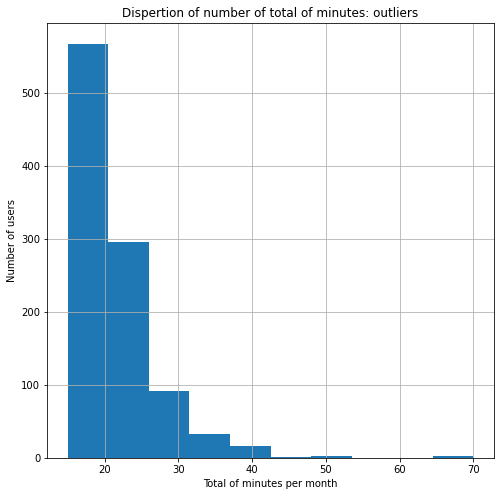

In [67]:
fig, ax = plt.subplots(figsize=(8,8))

plot_range = (15, 70)
ax.hist(x=final_data.query('plan == "surf"')['total_gb'], range=plot_range)
ax.grid()
ax.set_title('Dispertion of number of total of minutes: outliers')
ax.set_xlabel('Total of minutes per month')
ax.set_ylabel('Number of users')

plt.show()

We can see that most of users exceeding the limits of their plan need from 17 and up to 30 Gb per month.

<a id="conclusion3"></a>
### Conclusion

At this stage we've studied user's behaviour and how it influences monthly revenue.
We can sum it up to next points:

- On average user requires 425 minutes of calling per month. That means that half of the users don't go over the limit for both plans. Also we saw that Ultimate users almost don't go over their limit of 1000 minutes, while almost half of Surf users exceed the limits of their plan.
- In addition taking a look at the number of calls and calculating it's average we can tell that on average user makes 7-minute calls.
- The average number of sms varies per plan: it's 24 for Surf and 30 for Ultimate. Although in both plans there are outliers that pull their means: 31 for Surf and 37 for Ultimate. Still both don't exceed the limits of plans too much. We saw that the usage of this services varies a lot for Surf, and is centered around the average for Ultimate.
- The average usage of mobile Internet is 17 Gb per month for both plans, though if in case of Ultimate it doesn't exceed the limits, for Surf it means that half of the users exceed the limits of their plan on monthly basis. From correlation and scatterplot analysis we saw that this service influences the final revenue the most, and most of users exceeding 15 Gb threshold for Surf use 17 to 30 Gb per month.

<a id="testing"></a>
## Hypotheses testing

In the next step we'll test a few hypotheses:

- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NY-NJ area is different from that of the users from other regions.
<br><br>
* We will take standard value for alpha - 5%.

<b> The average revenue for Ultimate and Surf </b>
* The H0 is that there's no difference between the revenue of 2 plans.
* The H1 is that there is a difference between the revenue of 2 plans.

<b>The average revenue for NY-NJ area vs other regions</b>
* The H0 is that there's no difference between regions.
* The H1 is that there's difference between regions.

In [68]:
ultimate = final_data.query('plan == "ultimate"')
surf = final_data.query('plan == "surf"')

In [69]:
ult_sample = ultimate['revenue']
surf_sample = surf['revenue']

In [70]:
ult_sample

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2284    112.0
2285     70.0
2290     70.0
2291     70.0
2292     70.0
Name: revenue, Length: 720, dtype: float64

Let's check the sizes of our samples:

In [71]:
print('Percentage:', len(ult_sample) / len(final_data))
print('N:', len(ult_sample))

Percentage: 0.3139991277802006
N: 720


In [72]:
print('Percentage:', len(surf_sample) / len(final_data))
print('N:', len(surf_sample))

Percentage: 0.6860008722197994
N: 1573


In [73]:
nj = final_data[final_data['NY-NJ'] == 1]
others = final_data[final_data['NY-NJ'] == 0]

In [74]:
nj_sample = nj['revenue']
others_sample = others['revenue']

In [75]:
nj_sample

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2260    120.42
2261    170.27
2262    200.00
2263    110.33
2290     70.00
Name: revenue, Length: 406, dtype: float64

In [76]:
print('Percentage:',len(nj_sample) / len(final_data))
print('N:', len(nj_sample))

Percentage: 0.17706061927605757
N: 406


In [77]:
print('Percentage:',len(others_sample) / len(final_data))
print('N:', len(others_sample))

Percentage: 0.8229393807239425
N: 1887


In [78]:
alpha = 0.05

For the mathematical confirmation of one of our theories we're going to use Leven's test, as we compare the averages of two samples and it will help us to compare the variances, and the T-test.

In [79]:
def revenue_ttest(sample1, sample2):
    
    pvalue_levene = st.levene(sample1, sample2).pvalue
    
    alpha = 0.05

    if pvalue_levene < alpha:
        eqvar = False
    else:
        eqvar = True
    
    if st.ttest_ind(sample1, sample2, equal_var=eqvar).pvalue < alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print("Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same")

In [80]:
revenue_ttest(ult_sample, surf_sample)

Reject H0: average of sample 1 is not equal to average of sample 2


In [81]:
revenue_ttest(nj_sample, others_sample)

Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same


*Conclusion*: 
1) we can succesfully reject the H0 which states that there's no difference between the revenue of two plans. This means that there is a chance that there's a difference between the revenues. Now to answer which of the plans bring in more revenue we'll need to run a one-tailed hypothesis.

2) We failed to reject H0 that states that there's no difference between the revenue from NY-NJ area and other regions. It's highly possibly that revenue doesn't depend on whether the user lives in NY-NJ or another regions.

In [82]:
ult_sample.mean()

72.31388888888888

In [83]:
surf_sample.mean()

60.70640813731715

For our new test we'll use one-tailed hypothesis. We want to check whether revenue from Ultimate (as it costs more) is greater than the revenue from Surf.

* H0 is that the revenue from Ultimate is the same as revenue from Surf.
* H1 is that the revenue from Ultimate is greater than that from Surf.

The alpha will stay 5%.

In [84]:
average_value = surf_sample.mean()

results = st.ttest_1samp(ult_sample, average_value).pvalue

if (results/2 < alpha) and (ult_sample.mean() > average_value):
    print('Reject H0: the revenue from Ultimate was significantly greater than from Surf')
else:
    print("Fail to Reject H0: the Ultimate revenue wasn't significantly greater")

Reject H0: the revenue from Ultimate was significantly greater than from Surf


<a id="conclusion4"></a>
### Conclusion

We've run 3 hypotheses tests and here are the conclusions we've come to:

1) We can reject the null hypothesis being that there's no difference between the revenue of two plans. It is more likely that the first hypothesis is true, and considering all other statistical investogations we've done before, it is highly likely that the average revenue differs between two plans.

2) We failed to reject the null hypothesis being that there's no difference between revenues from NY-NJ area and all other regions. Still it is better to take into consideration that our sample size of NY-NJ was considerably smaller than the size of all other regions together.

3) As we saw that there's a high chance that there's a difference in average revenue per plan, we ran an additional test to find out that most likely average revenue from Ultimate is higher than that of Surf. 

<a id="final-conclusion"></a>
## Overall conclusion

In conclusion we'd like to sum up all the information we've gathered and found out from our data.

<b>User behaviour</b>
<br>Users' behaviour doesn't vary very much between the two plans, hence:
* half of the users need up to 425 minutes per month:
    * *Ultimate*: majority doesn't go over the limit of their plan being 3000 minutes per month
    * *Surf*: half of the users need more than 425 minutes for calls monthly, meaning that there's a great amount of users exceeding their plan limit being 500 minutes.
* there is some notable difference between average number of messages per plan, although we have to note that this service has the least influence among others, and also isn't used on daily basis:
    * *Ultimate*: on average  the user needs 30 sms per month, about a half of users use up to 140 messages per month, which still is a number much lower than plan's limit being 1000.
    * *Surf*: on average the user needs 24 sms per month, which is way low the limit being 50. The data is varied, meaning it mostly depends on individual need of the user.
* the most notable service for us is mobile Internet as it is a service that influences monthly revenue the most:
    * *Ultimate*: on average users need 17 Gb per month, while almost half of users use up to 32Gb, which slightly exceeds the limit of the plan being 30Gb.
    * *Surf*: the same as Ultimate users, 17Gb is the average, which is already over the threshold of 15Gb. Half of users use up to 32Gb. Note, that for this plan users pay extra 10 dollars for each additional Gb.
* at last, we'll describe revenue from each of the plans:
    * *Ultimate*: average and absolute majority pay 70 dollars per month, meaning only the basic cost of the plan.
    * *Surf*: on average monthly revenue is 40 dollars, which is already twice greater than a basic cost of the plan, being 20 dollars. 
    
<b>Hypotheses' testing</b>

We've tested some hypotheses and came to a conclusion that:
* After testing hypotheses about equality between the revenue of two plans, we've come to a conclusion that there's a high chance that the revenue between two plans has different potential and that Ultimate brings in more revenue. We advise advertising it, especially among many users of Surf that their current plan isn't sufficient for their needs, paying attention that usage of mobile Internet is the most insufficient and expensive for them at the moment.
* We've tested the idea of whether there could be a difference in revenue depending on the living area. We've checked NY-NJ area versus all other regions, and this hypothesis is highly likely can be rejected.

<b>Recommendations for business:</b>

* Surf users exceed the limits of their plan on a monthly basis, especially the Internet usage. They pay on average twice the basic price of their plan. Considering that Ultimate plan has potential to bring in more revenue, but is less popular because of it's high price, it is recommended to advertise this plan to the group of Surf users that actively use mobile Internet, while highlighting the Internet limits. 

* For those users and any other potential users of Megaline it can be a good idea to temporary reduce the basic cost of Ultimate, for example, for the first 3 months, as it will make the plan more attractive.

* Overall Ultimate is much less attractive for users but is more fit to satisfy their needs for mobile Internet and highly likely will bring more revenue, so overall recommendation is to use any other techniques that could make this plan more attractive.